In [ ]:
# Definition of problem

In [ ]:
# ------------------------------------------------------------------------------
# Project: IVY League Admission Predictor (Amboree)
# ------------------------------------------------------------------------------
# Business Context:
# Amboree, a leading test-prep platform for GMAT, GRE, and SAT, has launched a
# new feature to predict a student's probability of getting admitted into Ivy League
# graduate programs. The prediction is focused on Indian applicants.
#
# The model will assist students in making informed decisions about where they stand
# and how to improve their chances through test scores, SOP, LOR, and research work.
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Problem Definition:
# The objective is to build a supervised regression model that estimates the
# probability (ranging from 0 to 1) of admission to an Ivy League college based on
# the student’s academic profile, using structured input data.
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Dataset Features (Column Profiling):
#
# - Serial No.                  : Unique identifier for each student
# - GRE Score (out of 340)     : GRE standardized test score
# - TOEFL Score (out of 120)   : TOEFL English proficiency score
# - University Rating (out of 5): Ranking/reputation of the undergraduate institution
# - SOP & LOR Strength (out of 5): Combined strength of SOP and LOR (subjective)
# - Undergraduate GPA (out of 10): Academic performance in undergrad
# - Research Experience (0 or 1): Whether the student has done research
# - Chance of Admit (0 to 1)    : Target variable; probability of admission
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Problem Type:
# - Supervised Learning (Regression)
# - Target Variable: Chance of Admit (continuous between 0 and 1)
# - Suitable Evaluation Metrics: R² Score, RMSE, MAE, Adjusted R²
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Business Questions to Address:
# 1. Which variables have the strongest impact on admission chances?
# 2. How significant is research experience in predicting admissions?
# 3. What is the ideal student profile to achieve >90% admit probability?
# 4. Are SOP and LOR as important as GRE or GPA?
# 5. Can the model help generate actionable recommendations for students?
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Potential Real-World Value:
# - Empowers students to assess their profiles and prepare strategically
# - Enables personalized career counseling
# - Increases platform stickiness and engagement on Amboree's portal
# - May generate institutional insights for university partners
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Future Enhancements:
# - Incorporate additional categorical features like program type, location
# - Perform text analysis on SOPs using NLP techniques
# - Create a web-based app for real-time profile evaluation
# - Use SHAP or LIME for model interpretability

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!gdown 18E0KM5sddbIeUCgc2VOiwzNGTpbuQCjN

Downloading...
From: https://drive.google.com/uc?id=18E0KM5sddbIeUCgc2VOiwzNGTpbuQCjN
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 29.7MB/s]


In [4]:
# Load data
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
# Statistical Summary
display(df.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Check for missing values
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.drop('Serial_No.', axis=1, inplace=True)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
# Convert 'University Rating' and 'Research' to category
df['University_Rating'] = df['University_Rating'].astype('category')
df['Research'] = df['Research'].astype('category')

['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR_', 'CGPA', 'Chance_of_Admit_']


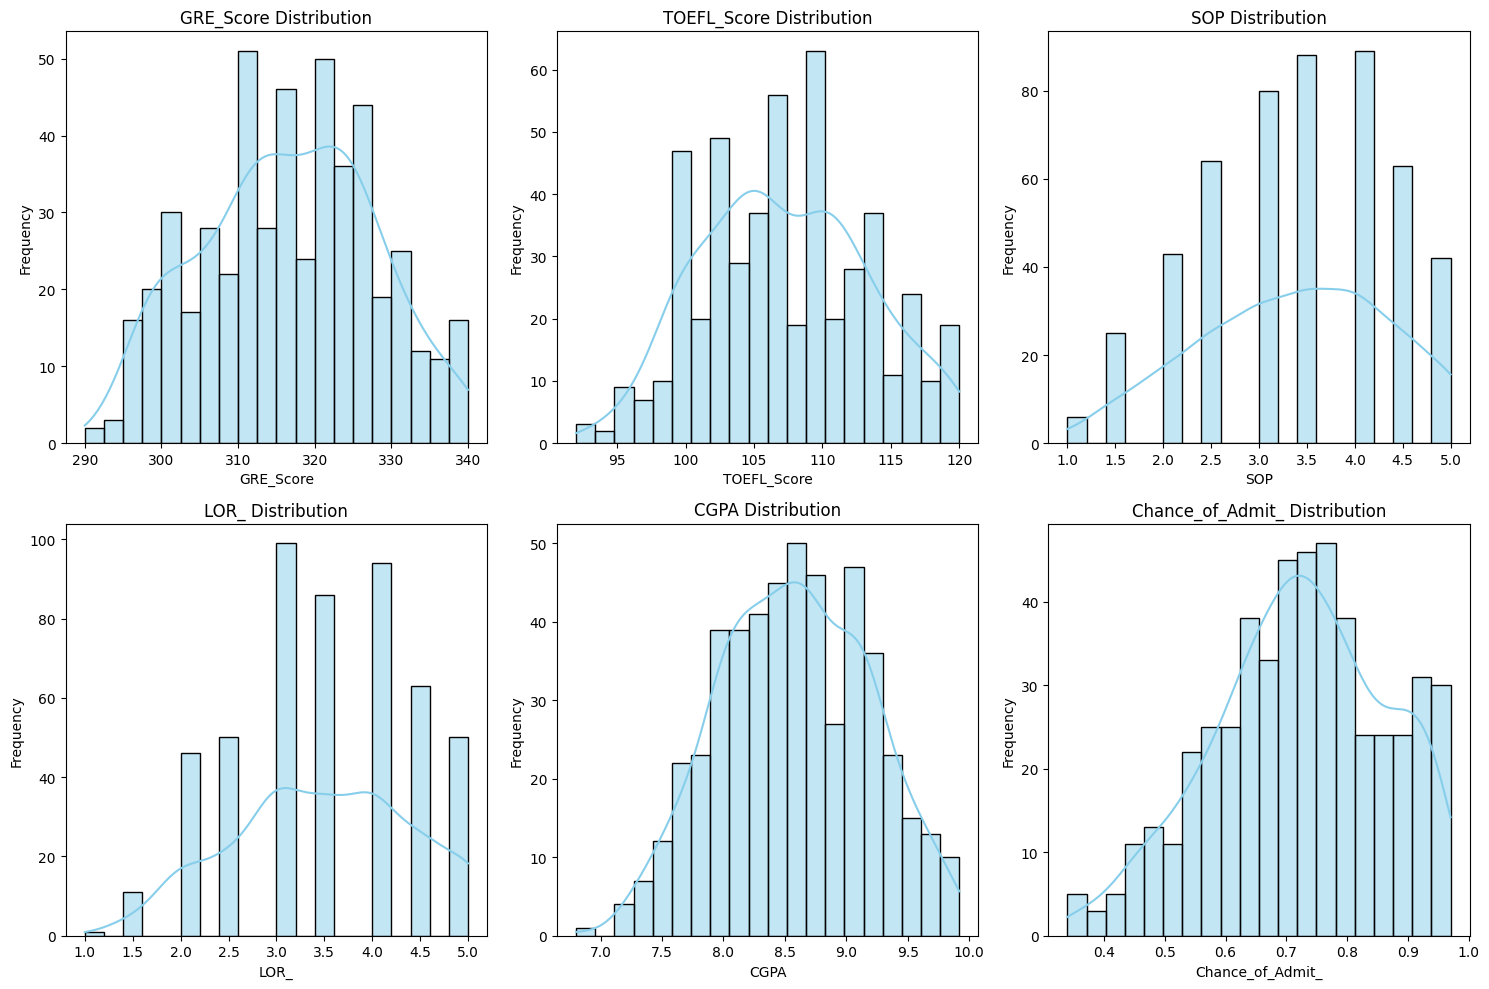

In [11]:
# Univariate Analysis
# List of numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop over each column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Calculate Mean and Median for each column
columns = df.select_dtypes(include=['number']).columns.tolist()

for col in columns:
    mean_value = df[col].mean()
    median_value = df[col].median()
    print(f"{col} - Mean: {mean_value:.2f}, Median: {median_value:.2f}")

GRE_Score - Mean: 316.47, Median: 317.00
TOEFL_Score - Mean: 107.19, Median: 107.00
SOP - Mean: 3.37, Median: 3.50
LOR_ - Mean: 3.48, Median: 3.50
CGPA - Mean: 8.58, Median: 8.56
Chance_of_Admit_ - Mean: 0.72, Median: 0.72


In [13]:
def check_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")
    return outliers

columns = df.select_dtypes(include=['number']).columns.tolist()
for col in columns:
    outliers = check_outliers_iqr(df, col)

# LOR Distribution:
# - Most LOR values fall between 3.0 and 4.5
# - Very few values around 1.0 and 1.5 could be considered minor outliers

# CGPA Distribution:
# - CGPA is approximately normally distributed with a slight left skew
# - CGPA values below 7.0 may be mild outliers

# Chance of Admit Distribution:
# - Majority of data between 0.6 to 0.9
# - Values below 0.4 could be considered potential low-end outliers

# GRE Score Distribution:
# - GRE scores follow a near normal distribution
# - No significant outliers, although values near 290 might be slightly low

# TOEFL Score Distribution:
# - Normally distributed
# - Minor potential outliers around 93-95

# SOP Distribution:
# - SOP scores are heavily populated between 3.0 and 5.0
# - Scores around 1.0 may be considered minor outliers


Outliers in GRE_Score: 0
Outliers in TOEFL_Score: 0
Outliers in SOP: 0
Outliers in LOR_: 1
Outliers in CGPA: 0
Outliers in Chance_of_Admit_: 2


In [14]:
# None of the columns strongly require IQR-based outlier detection.
# Mean and median are very close in all cases.
# Data is fairly symmetric, minimal outlier concern.

#  Good to proceed without special outlier handling!

In [15]:
from scipy.stats import skew

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in numeric_cols:
  print(f"Skewness of {col}:", skew(df[col].dropna()))

# Skewness Results for All Numeric Columns:

# GRE_Score: Skewness = -0.0397
# - Interpretation: Very close to 0 → Distribution is nearly symmetric.
# - No transformation needed.

# TOEFL_Score: Skewness = 0.0953
# - Interpretation: Slightly positive skew, but still very close to 0 → Distribution is almost symmetric.
# - No transformation needed.

# SOP: Skewness = -0.2282
# - Interpretation: Slight negative skew, but well within acceptable range (-0.5 to 0.5).
# - No transformation needed.

# LOR_: Skewness = -0.1449
# - Interpretation: Slight negative skew, almost symmetric.
# - No transformation needed.

# CGPA: Skewness = -0.0265
# - Interpretation: Very close to 0 → Perfectly symmetric distribution.
# - No transformation needed.

# Chance_of_Admit_: Skewness = -0.2891
# - Interpretation: Slight negative skew, still within acceptable limits.
# - No transformation needed.

#  Conclusion:
# - All numeric columns have skewness between -0.5 and +0.5.
# - Therefore, the data is reasonably symmetric and no skewness correction (like log/sqrt transformations) is required.


Skewness of GRE_Score: -0.03972223277299966
Skewness of TOEFL_Score: 0.09531393010261811
Skewness of SOP: -0.22828490586525177
Skewness of LOR_: -0.14485407992929378
Skewness of CGPA: -0.02653261314181717
Skewness of Chance_of_Admit_: -0.28909558547899383


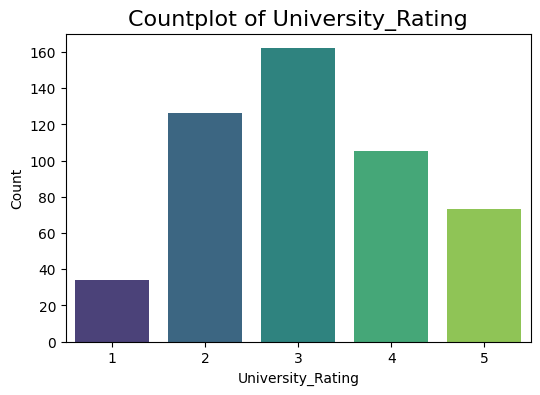

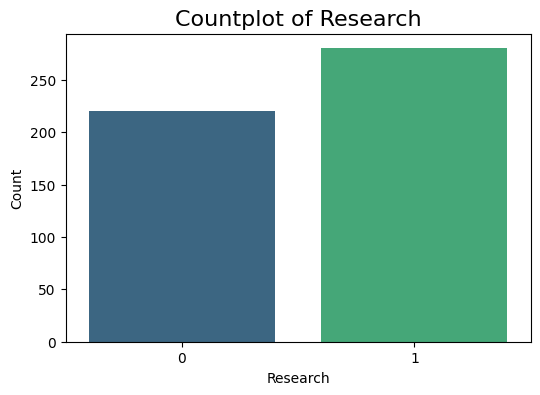

In [66]:
categorical_features = ['University_Rating', 'Research']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue=feature, palette='viridis', legend=False)
    plt.title(f'Countplot of {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Analysis of 'Research' feature:
# This countplot visualizes the distribution of applicants with and without research experience.
# Observations:
# - A higher number of students (~280) have research experience compared to those without (~220).
# - This implies that research experience is a common trait among applicants aiming for top graduate programs.
# - Since prior research can strengthen an application, this feature is likely to have predictive power for admission chances.
# - It's advisable to explore how research experience correlates with 'Chance of Admit' in further analysis or model feature importance.


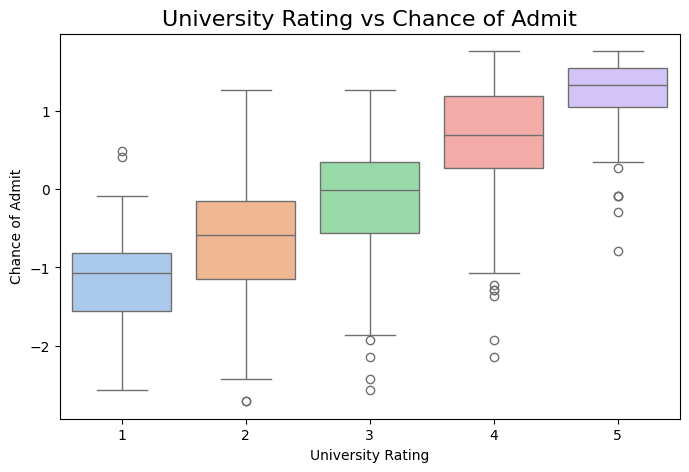

In [67]:
# Bivariate Analysis
# University Rating vs Chance of Admit
plt.figure(figsize=(8, 5))
sns.boxplot(x='University_Rating', y='Chance_of_Admit_', hue='University_Rating', data=df, palette='pastel', legend=False)
plt.title('University Rating vs Chance of Admit', fontsize=16)
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

# This boxplot explores how a student's chance of admission varies across different university ratings.
#
# Key Observations:
# 1. There is a clear positive trend: Higher university ratings are associated with higher chances of admission.
# 2. Median admission chances increase steadily from rating 1 to 5, indicating stronger applicants are generally seen at higher-rated institutions.
# 3. Variance in admission chances decreases as university rating increases — indicating more consistent admissions performance among applicants to top-rated schools.
# 4. Outliers exist at all levels, especially at lower ratings — possibly due to exceptional student profiles or non-academic factors.
#
# Strategic Insight:
# - Students aiming for IVY league or top universities should target improving their profile to fit the expectations of higher-rated institutions.
# - University rating can be a significant feature in a predictive model for admission chances.


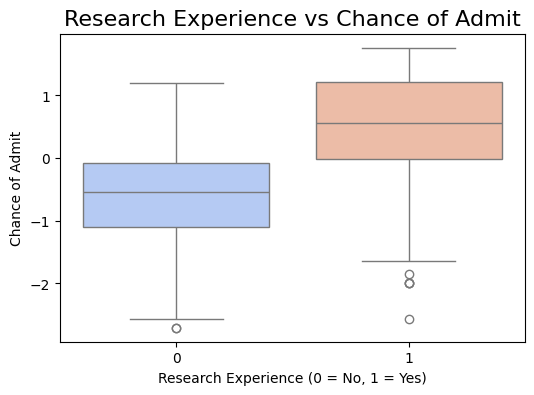

In [68]:
# Research vs Chance of Admit
plt.figure(figsize=(6, 4))
sns.boxplot(x='Research', y='Chance_of_Admit_', hue='Research', data=df, palette='coolwarm', legend=False)
plt.title('Research Experience vs Chance of Admit', fontsize=16)
plt.xlabel('Research Experience (0 = No, 1 = Yes)')
plt.ylabel('Chance of Admit')
plt.show()

# This boxplot illustrates the relationship between having research experience and the chance of graduate admission.
#
# Key Observations:
# 1. Applicants **with research experience (1)** show a significantly **higher median chance of admission** compared to those without (0).
# 2. The distribution for research-experienced applicants is more positively skewed, suggesting top-tier applicants often have research backgrounds.
# 3. Outliers in both groups indicate that other features (like GPA, GRE, SOP) also influence admissions.
# 4. The variance is higher for research-experienced applicants, possibly due to differing research quality or relevance.
#
# Strategic Insight:
# - Research experience is a **strong differentiator** in admission chances, especially for competitive or IVY league institutions.
# - Students should be encouraged to pursue **research internships or projects** to boost their profiles.
# - This feature should be prioritized in any predictive model or feature engineering step.


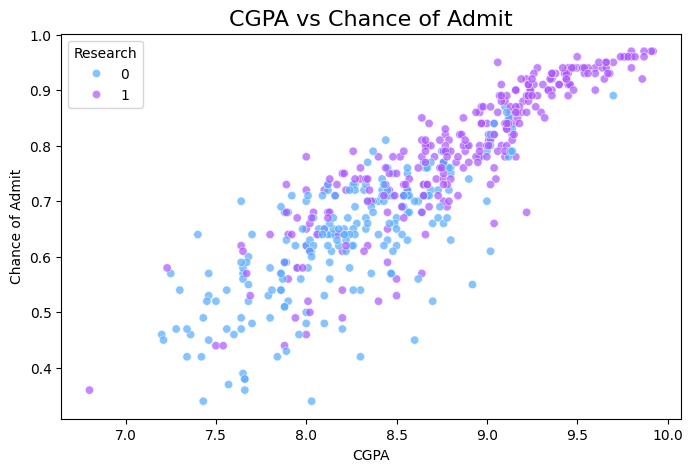

In [19]:
# CGPA vs Chance of Admit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CGPA', y='Chance_of_Admit_', data=df, hue='Research', palette='cool', alpha=0.7)
plt.title('CGPA vs Chance of Admit', fontsize=16)
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

# This scatter plot explores the relationship between CGPA and the Chance of Admission,
# differentiated by Research experience (0 = No, 1 = Yes).
#
# Key Observations:
# 1. There is a **strong positive correlation** between CGPA and Chance of Admit.
#    - As CGPA increases, the likelihood of admission significantly increases.
#
# 2. Data points for applicants **with research experience (purple)** generally lie **above**
#    those without (blue) for the same CGPA range.
#    - This indicates that **research experience adds value** even if CGPA is the same.
#
# 3. High CGPA (9.0+) applicants with research experience often exceed **0.9 admission probability**.
#    - These are ideal Ivy League profile candidates.
#
# 4. Applicants with low CGPA (<8.0) rarely have high admission chances,
#    regardless of research experience.
#
# Strategic Insight:
# - CGPA is one of the **most important predictors** of admission chances.
# - However, adding research experience boosts the chances, especially in the 8.0–9.0 CGPA range.
# - For aspiring students: aim for **high CGPA + research** for optimal profile strength.


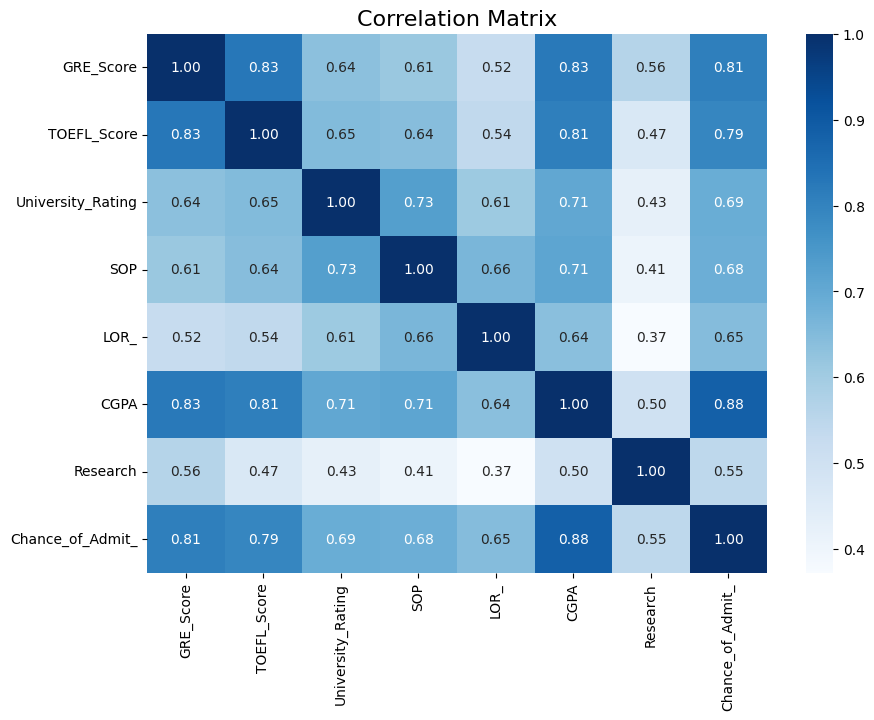

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
#plt.figure(figsize=(10,8))
#ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# 📌 Correlation Matrix Analysis for Admission Prediction

# This heatmap visualizes Pearson correlation coefficients among all features and Chance of Admit.

# Key Insights:

# 1. 🔥 Top 3 Features Correlated with Chance of Admit:
#    - CGPA: 0.88 (Strongest correlation)
#    - GRE Score: 0.81
#    - TOEFL Score: 0.79
#    => These academic scores are critical indicators for admissions into top universities.

# 2. 🏫 University Rating, SOP, LOR_:
#    - Moderate correlation with Chance of Admit (~0.65–0.69)
#    => These reflect soft aspects of the application that support the core academic profile.

# 3. 🧪 Research:
#    - Correlation = 0.55 (Moderate impact)
#    => Having research experience improves chances, but less so than GPA and test scores.

# 4. 🔗 Inter-feature correlations:
#    - GRE and CGPA: 0.83, TOEFL and CGPA: 0.81
#    => Strong relationships suggest overall academic strength is consistent across metrics.

# 🎯 Takeaway for Applicants:
# - Focus on **maximizing CGPA, GRE, and TOEFL scores**.
# - Strengthen SOP, LOR, and gain **research experience** to boost borderline cases.

# This correlation matrix helps in **feature selection** for predictive modeling.


<Axes: >

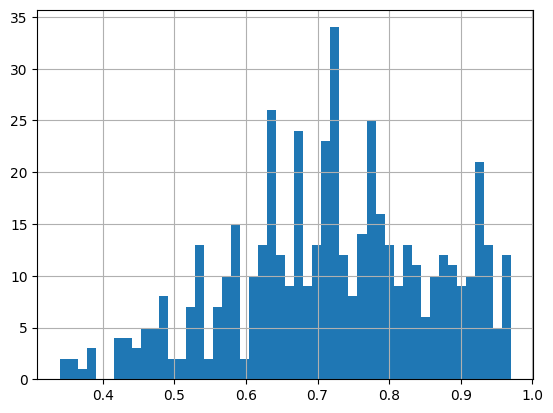

In [21]:
df['Chance_of_Admit_'].hist(bins=50)

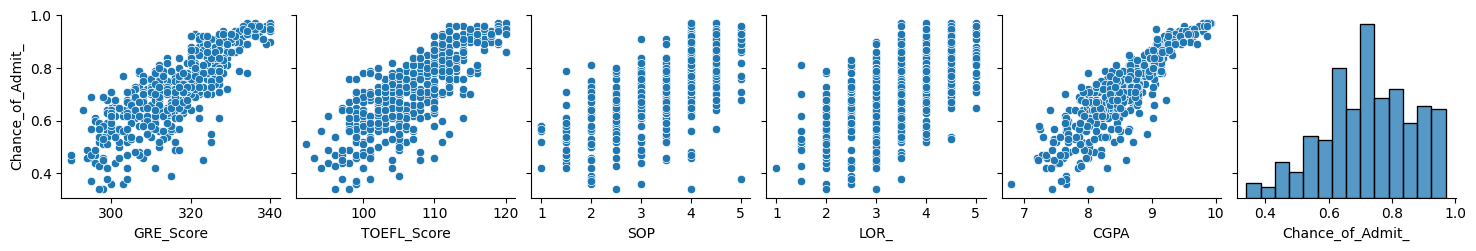

In [22]:
sns.pairplot(df, y_vars=["Chance_of_Admit_"]);

In [23]:
# Check if there are any duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [24]:
# Feature Engineering - CGPA Category
def cgpa_category(cgpa):
    if cgpa >= 9:
        return 'High'
    elif cgpa >= 8:
        return 'Medium'
    else:
        return 'Low'

df['CGPA_Category'] = df['CGPA'].apply(cgpa_category)

# Label Encoding CGPA_Category
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['CGPA_Category'] = le.fit_transform(df['CGPA_Category'])

# Scaling numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [25]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_,CGPA_Category
0,1.819238,1.778865,4,1.137360,1.098944,1.776806,1,1.406107,-1.434643
1,0.667148,-0.031601,4,0.632315,1.098944,0.485859,1,0.271349,0.849820
2,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,1,-0.012340,0.849820
3,0.489904,0.462163,3,0.127271,-1.064332,0.154847,1,0.555039,0.849820
4,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,0,-0.508797,0.849820


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Separate Features (X) and Target (y)
X = df.drop('Chance_of_Admit_', axis=1)
y = df['Chance_of_Admit_']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# From Stats Model Library
# Add a constant (important for intercept term)
X_sm = sm.add_constant(X_train)

# Build the model
model = sm.OLS(y_train, X_sm).fit()

# Show the detailed summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     192.1
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          2.26e-121
Time:                        15:04:02   Log-Likelihood:                -194.26
No. Observations:                 350   AIC:                             406.5
Df Residuals:                     341   BIC:                             441.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1333      0.10

In [27]:
# OLS Regression Summary:
# - R-squared: 0.818 → 81.8% variance explained (very good fit)
# - Adjusted R-squared: 0.814 → still strong after adjusting for number of predictors
# - F-statistic: 192.1, p-value ≈ 2.26e-121 → Model is highly statistically significant

# Important Features (p < 0.05):
# - GRE_Score (positive impact)
# - TOEFL_Score (positive impact)
# - LOR (Letter of Recommendation strength, positive impact)
# - CGPA (very strong positive impact)
# - Research (positive impact)

# Insignificant Features (p > 0.05):
# - University_Rating
# - SOP (Statement of Purpose)
# - CGPA_Category

# Intercept (const):
# - Negative (-0.1333), but not practically meaningful unless all predictors are zero (unlikely).

# Model Diagnostics:
# - Skewness: -1.114 → Residuals are left-skewed (not perfectly normal).
# - Kurtosis: 5.590 → Heavy tails (leptokurtic distribution).
# - Durbin-Watson: 2.075 → Residuals have no serious autocorrelation issues (ideal ≈ 2).

# Recommendations for Improvement:
# 1. Feature Selection:
#    - Consider dropping or re-evaluating SOP, CGPA_Category, and University_Rating.
# 2. Residual Normalization:
#    - Apply transformations like Box-Cox or Yeo-Johnson if skewness or kurtosis needs correction.
# 3. Regularization:
#    - Explore Ridge or Lasso regression to potentially improve generalization.
# 4. Interaction Terms:
#    - Try adding interaction features (e.g., GRE x Research) if you believe variables might interact.


In [28]:
X_test_sm = sm.add_constant(X_test)  # Add a constant to the test set
y_test_pred = model.predict(X_test_sm)
X_train_sm = sm.add_constant(X_train)  # Add a constant to the test set
y_train_pred = model.predict(X_train_sm)

In [29]:
# Display Coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + list(X.columns),
    'Coefficient': model.params.values
})
print(coefficients)

             Feature  Coefficient
0          Intercept    -0.133254
1          GRE_Score     0.178086
2        TOEFL_Score     0.145079
3  University_Rating     0.020672
4                SOP     0.009826
5               LOR_     0.100423
6               CGPA     0.491190
7           Research     0.145988
8      CGPA_Category    -0.017265


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'GRE_Score'),
  Text(1, 0, 'TOEFL_Score'),
  Text(2, 0, 'University_Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR_'),
  Text(5, 0, 'CGPA'),
  Text(6, 0, 'Research'),
  Text(7, 0, 'CGPA_Category')])

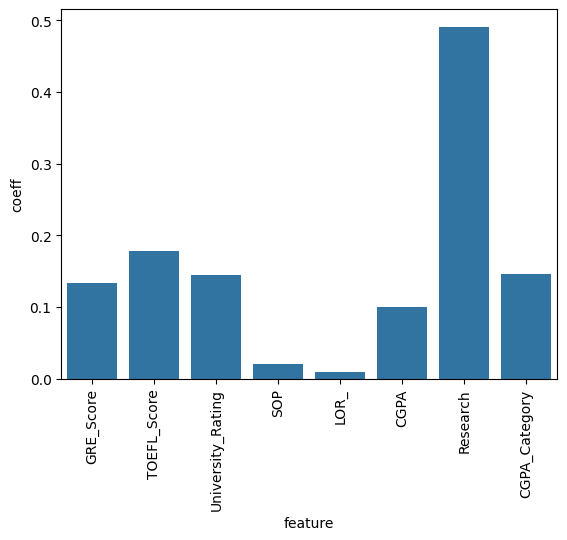

In [30]:
imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.params))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [31]:
X_test.columns[np.argmax(np.abs(model.params))]

'Research'

In [32]:
X_test.columns[np.argmin(np.abs(model.params))]

'LOR_'

In [33]:
# R2 Score on Train Data
r2_train = r2_score(y_train, y_train_pred)
print(f'train R2 Score: {r2_train:.4f}')

# R2 Score on Test Data
r2_test = r2_score(y_test, y_test_pred)
print(f'test R2 Score: {r2_test:.4f}')

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE: {train_rmse:.4f}')

# RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE: {test_rmse:.4f}')

train R2 Score: 0.8184
test R2 Score: 0.8247
RMSE: 0.4215
RMSE: 0.4287


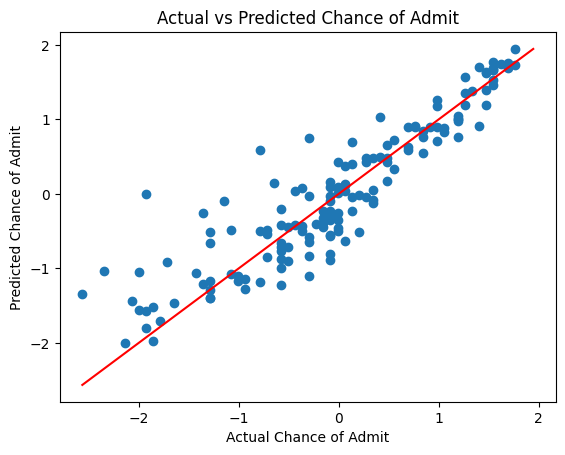

In [34]:
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())

plt.scatter(y_test, y_test_pred)
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Chance of Admit")
plt.show()


In [35]:
# From Linear Regression Library
# Create and Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predict
y_pred = lr.predict(X_test)

In [36]:
# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')


R2 Score: 0.8247
RMSE: 0.4287


In [37]:
lr.score(X_train, y_train)

0.8183937324567628

In [38]:
lr.score(X_test, y_test)

0.8246765541431549

In [39]:
# Display Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print(coefficients)


             Feature  Coefficient
0          GRE_Score     0.178086
1        TOEFL_Score     0.145079
2  University_Rating     0.020672
3                SOP     0.009826
4               LOR_     0.100423
5               CGPA     0.491190
6           Research     0.145988
7      CGPA_Category    -0.017265


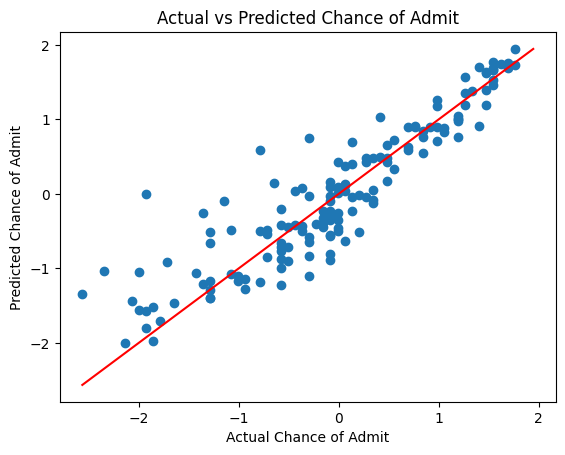

In [40]:
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color='red')  # Corrected perfect line
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Chance of Admit")
plt.show()

In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: First split into train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Then split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ridge Regression (L2 Regulaizaton)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge_test = ridge.predict(X_test)
y_pred_ridge_val = ridge.predict(X_val)  # Predict on validation set
y_pred_ridge_train = ridge.predict(X_train)

# Lasso Regression (L1 Regulaizaton)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
x_train_pred_lasso = lasso.predict(X_train)
x_val_pred_lasso = lasso.predict(X_val)  # Predict on validation set
x_test_pred_lasso = lasso.predict(X_test)

# Metrics for Ridge
print('Train MSE for Ridge (L2):', mean_squared_error(y_train, y_pred_ridge_train))
print('Validation MSE for Ridge (L2):', mean_squared_error(y_val, y_pred_ridge_val))
print('Test MSE for Ridge (L2):', mean_squared_error(y_test, y_pred_ridge_test))
print('R² for Ridge (train):', ridge.score(X_train, y_train))
print('R² for Ridge (validation):', ridge.score(X_val, y_val))
print('R² for Ridge (test):', ridge.score(X_test, y_test))

print("*"*20)

# Metrics for Lasso
print('Train MSE for Lasso (L1):', mean_squared_error(y_train, x_train_pred_lasso))
print('Validation MSE for Lasso (L1):', mean_squared_error(y_val, x_val_pred_lasso))
print('Test MSE for Lasso (L1):', mean_squared_error(y_test, x_test_pred_lasso))
print('R² for Lasso (train):', lasso.score(X_train, y_train))
print('R² for Lasso (validation):', lasso.score(X_val, y_val))
print('R² for Lasso (test):', lasso.score(X_test, y_test))


Train MSE for Ridge (L2): 0.17768193582334146
Validation MSE for Ridge (L2): 0.18668139411406795
Test MSE for Ridge (L2): 0.18104171472710665
R² for Ridge (train): 0.8183870212381137
R² for Ridge (validation): 0.8209222184982987
R² for Ridge (test): 0.8282445533227507
********************
Train MSE for Lasso (L1): 0.1776799793367422
Validation MSE for Lasso (L1): 0.18692586569448952
Test MSE for Lasso (L1): 0.18071683217842302
R² for Lasso (train): 0.8183890210101082
R² for Lasso (validation): 0.8206877043493668
R² for Lasso (test): 0.8285527714997101


In [42]:
lasso.coef_.round(4)

array([ 0.1787,  0.1448,  0.0211,  0.0095,  0.0999,  0.4914,  0.1418,
       -0.0167])

In [43]:
ridge.coef_.round(4)

array([ 0.1799,  0.1457,  0.0216,  0.0111,  0.1008,  0.486 ,  0.1442,
       -0.0179])

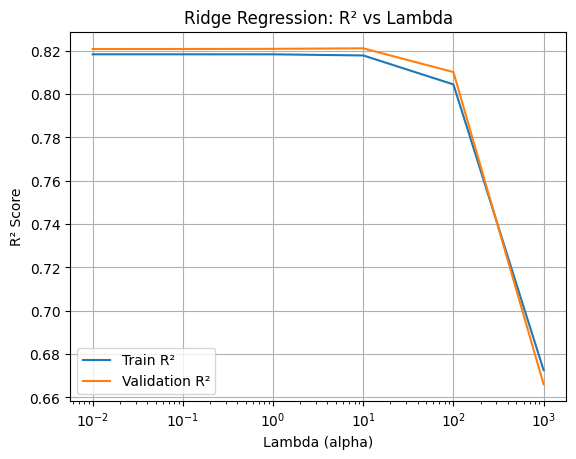

In [44]:
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
val_scores = []

for lambd in lambdas:
    ridge_model = Ridge(alpha=lambd)
    ridge_model.fit(X_train, y_train)

    train_scores.append(ridge_model.score(X_train, y_train))
    val_scores.append(ridge_model.score(X_val, y_val))
    test_scores.append(ridge_model.score(X_test, y_test))

# Plotting
plt.plot(lambdas, train_scores, label='Train R²')
#lt.plot(lambdas, test_scores, label='Test R²')
plt.plot(lambdas, val_scores, label='Validation R²')
plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: R² vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


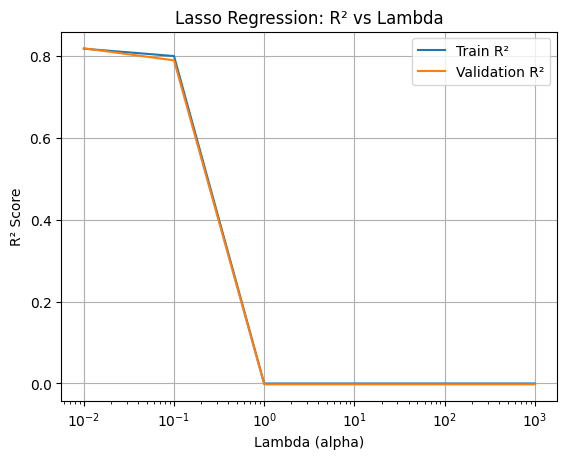

In [45]:
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
val_scores = []

for lambd in lambdas:
    Lasso_model = Lasso(alpha=lambd)
    Lasso_model.fit(X_train, y_train)

    train_scores.append(Lasso_model.score(X_train, y_train))
    val_scores.append(Lasso_model.score(X_val, y_val))
    test_scores.append(Lasso_model.score(X_test, y_test))


# Plotting
plt.plot(lambdas, train_scores, label='Train R²')
#plt.plot(lambdas, test_scores, label='Test R²')
plt.plot(lambdas, val_scores, label='Validation R²')
plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('R² Score')
plt.title('Lasso Regression: R² vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ----------------------------------------------------------------------
# Ridge and Lasso Regression: R² vs Lambda Analysis
# ----------------------------------------------------------------------

# 1. Lambda (alpha) controls the strength of regularization.
#    Lower values (~0.01) = minimal regularization, model behaves like simple linear regression.
#    Higher values (~1000) = strong regularization, leads to underfitting.

# ----------------------------------------------------------------------
# Lasso Regression Analysis
# ----------------------------------------------------------------------

# Lasso adds L1 penalty — drives some coefficients to zero (feature elimination).
# Ideal for sparse feature spaces or when feature selection is desired.

# Observation from plot:
# - At alpha = 0.01, 0.1: High Train and Validation R² (~0.8) → Model fits well.
# - At alpha = 1 and beyond: R² drops to zero → Model is underfitting.
# - Conclusion: Lasso is **very sensitive to alpha**. Over-regularizes quickly.

# Recommendation:
# - Fine-tune alpha between 0.001 to 0.1 for Lasso.
# - Use LassoCV to auto-tune the alpha using cross-validation.

# ----------------------------------------------------------------------
# Ridge Regression Analysis
# ----------------------------------------------------------------------

# Ridge adds L2 penalty — shrinks coefficients, but keeps all features.
# Ideal when multicollinearity is present and interpretability is less important.

# Observation from plot:
# - R² is consistently high (~0.82) for alpha from 0.01 to 10.
# - Drop in R² at alpha ≥ 100 indicates **over-regularization**.
# - Conclusion: Ridge is more stable than Lasso and can tolerate a wider range of alpha.

# Recommendation:
# - Optimal alpha range = 1 to 10 (for best generalization).
# - Use RidgeCV for automatic alpha tuning via cross-validation.

# ----------------------------------------------------------------------
# General Suggestions
# ----------------------------------------------------------------------

# Use Ridge when you want coefficient shrinkage without eliminating features.
# Use Lasso when you want automatic feature selection and a sparse model.
# Use ElasticNet if you want the benefits of both (L1 + L2 penalties).
# Always validate on unseen data (X_test) to ensure true generalization.
# Consider plotting test_scores too for final model selection.
# Use `plt.xscale('log')` to visualize behavior across magnitudes of alpha.


In [46]:
# Assumption 1 : Linearity

Feature: GRE_Score
  ➡️ Pearson Correlation: 0.816 (p-value: 0.000)
  ➡️ Spearman Correlation: 0.827 (p-value: 0.000)
--------------------------------------------------
Feature: TOEFL_Score
  ➡️ Pearson Correlation: 0.786 (p-value: 0.000)
  ➡️ Spearman Correlation: 0.791 (p-value: 0.000)
--------------------------------------------------
Feature: SOP
  ➡️ Pearson Correlation: 0.682 (p-value: 0.000)
  ➡️ Spearman Correlation: 0.703 (p-value: 0.000)
--------------------------------------------------
Feature: LOR_
  ➡️ Pearson Correlation: 0.615 (p-value: 0.000)
  ➡️ Spearman Correlation: 0.614 (p-value: 0.000)
--------------------------------------------------
Feature: CGPA
  ➡️ Pearson Correlation: 0.878 (p-value: 0.000)
  ➡️ Spearman Correlation: 0.890 (p-value: 0.000)
--------------------------------------------------
Feature: CGPA_Category
  ➡️ Pearson Correlation: -0.485 (p-value: 0.000)
  ➡️ Spearman Correlation: -0.465 (p-value: 0.000)
---------------------------------------------

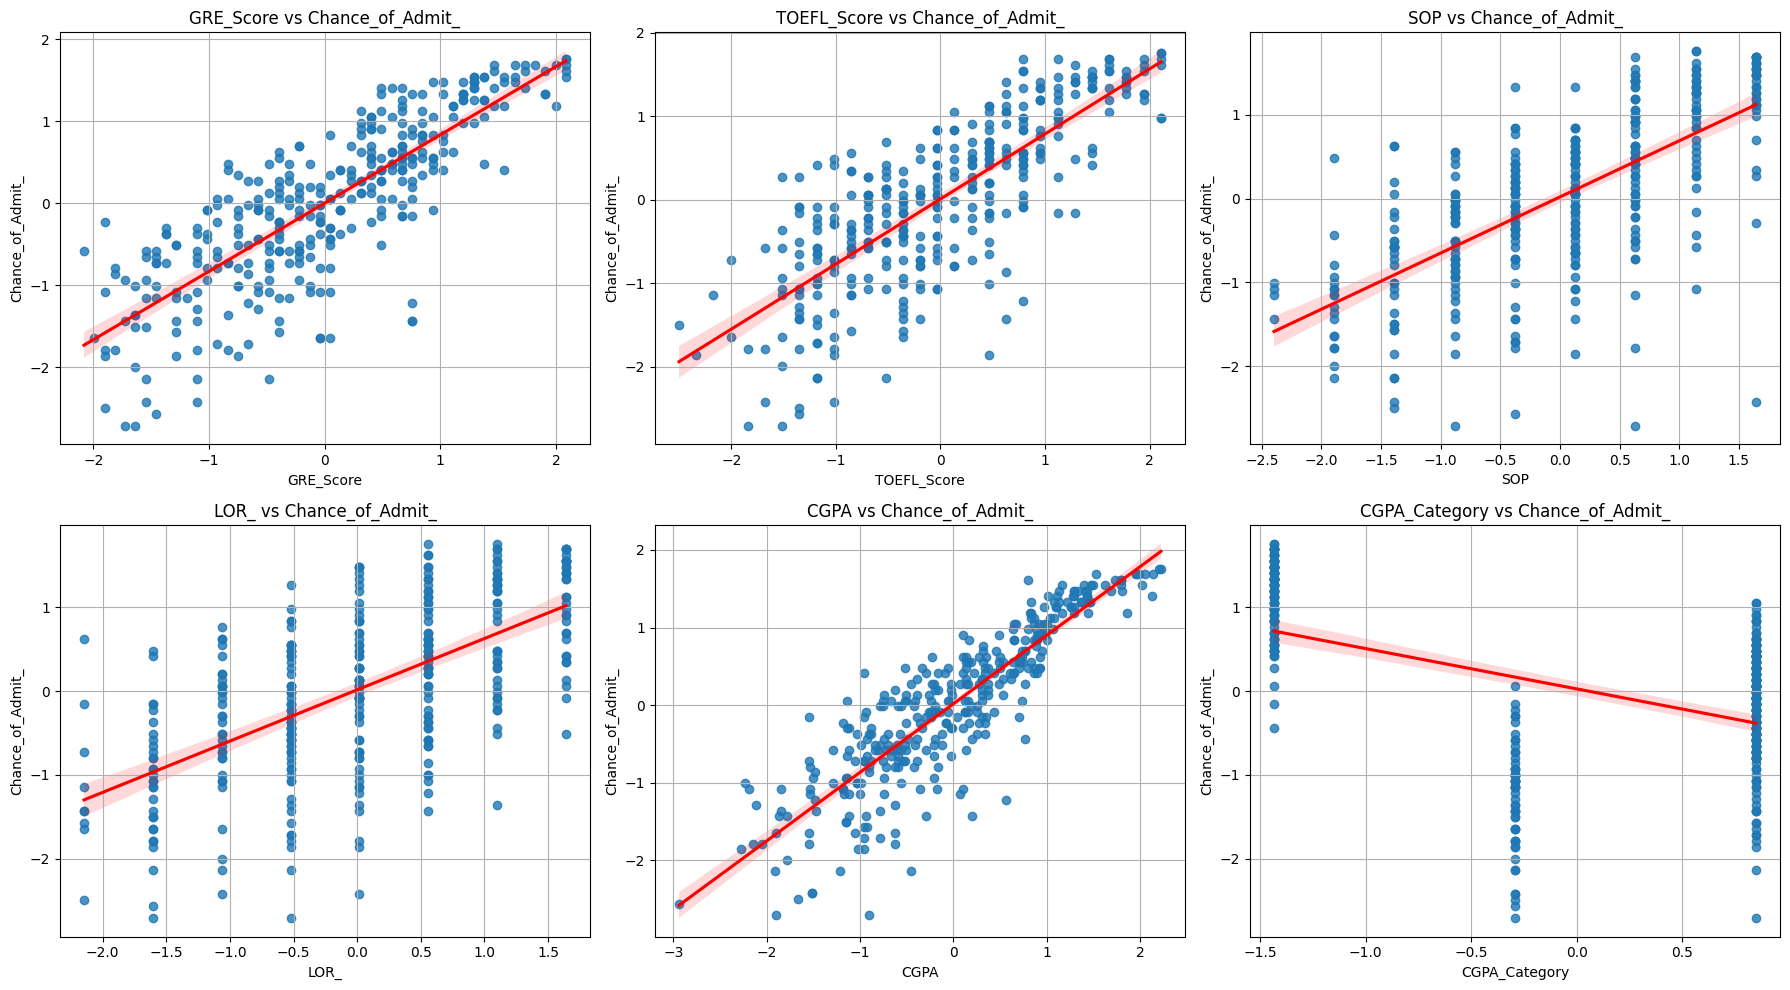

In [47]:
from scipy.stats import pearsonr, spearmanr

# --- Get all numeric features ---
features = X_train.select_dtypes(include=['number']).columns.tolist()

# --- Remove 'const' if present ---
features = [feat for feat in features if feat != 'const']

# --- Plot settings ---
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))  # Bigger figure
axes = axes.flatten()  # Flatten so we can loop easily

# --- Loop through each feature ---
for idx, feature in enumerate(features):
    ax = axes[idx]

    # Scatter plot with regression line
    sns.regplot(x=X_train[feature], y=y_train, line_kws={"color": "red"}, ax=ax)
    ax.set_title(f'{feature} vs Chance_of_Admit_', fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel('Chance_of_Admit_')
    ax.grid(True)

    # Pearson correlation
    pearson_corr, pearson_pval = pearsonr(X_train[feature], y_train)

    # Spearman correlation
    spearman_corr, spearman_pval = spearmanr(X_train[feature], y_train)

    print(f"Feature: {feature}")
    print(f"  ➡️ Pearson Correlation: {pearson_corr:.3f} (p-value: {pearson_pval:.3f})")
    print(f"  ➡️ Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_pval:.3f})")
    print("-" * 50)

# Hide any extra empty plots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [48]:
# Assumption 2: No Multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_thr = 5         # VIF threshold
r2_thr = 0.85       # Adjusted R² threshold
i = 0               # Counter for how many features removed
feats_removed = []  # Start with empty list

cols2 = X_train.columns.tolist()   # Start with all features

while True:
    # Prepare data
    X_t = X_train[cols2]

    # Calculate VIF
    vif = pd.DataFrame()
    vif['Features'] = X_t.columns
    vif['VIF'] = [variance_inflation_factor(X_t.values, j) for j in range(X_t.shape[1])]
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print(vif)

    # Fit model
    X2_sm = sm.add_constant(X_t)
    sm_model = sm.OLS(y_train, X2_sm).fit()

    # Check Stopping Condition
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('\n✅ Reached stopping threshold ✅')
        print('Highest VIF:', vif.iloc[0])
        print('Current Adjusted R²:', round(sm_model.rsquared_adj, 4))
        print('Number of Features removed:', i)
        print('List of Features removed:', feats_removed)
        break

    # Update: Remove feature with highest VIF
    feat_to_remove = vif.iloc[0]['Features']
    feats_removed.append(feat_to_remove)
    cols2 = [feat for feat in cols2 if feat != feat_to_remove]  # Remove from list
    i += 1

            Features   VIF
5               CGPA  4.74
0          GRE_Score  4.39
1        TOEFL_Score  3.52
6           Research  3.29
2  University_Rating  3.02
3                SOP  2.59
4               LOR_  1.95
7      CGPA_Category  1.38

✅ Reached stopping threshold ✅
Highest VIF: Features    CGPA
VIF         4.74
Name: 5, dtype: object
Current Adjusted R²: 0.8141
Number of Features removed: 0
List of Features removed: []


In [50]:
# Assumption 3: Errors Should be Normally Distributed

In [51]:
# Residuals
# From Stats Model Library
# Add a constant (important for intercept term)
X_sm = sm.add_constant(X_train)

# Build the model
model = sm.OLS(y_train, X_sm).fit()

y_pred_train = model.predict(X_sm)
residuals = y_train - y_pred_train

# Check mean
print('Mean of residuals:', np.mean(residuals))

assert np.isclose(np.mean(residuals), 0, atol=1e-6), "Mean of residuals is not close to zero!"

Mean of residuals: -2.379049338482478e-16


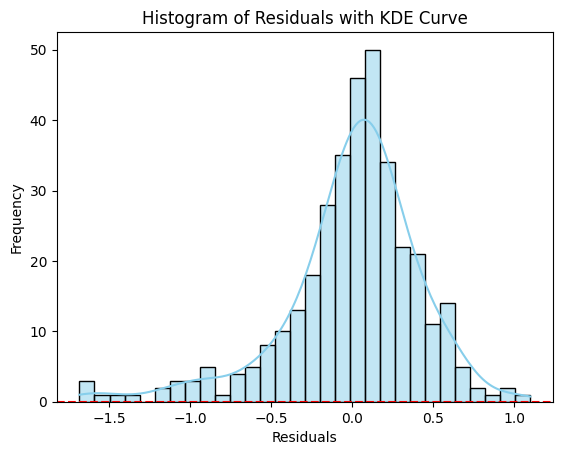

In [52]:
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with KDE Curve")
plt.show()

In [53]:
from scipy import stats
# Null Hypothesis (H₀):
# ➔ Residuals are normally distributed.

# Alternative Hypothesis (H₁):
# ➔ Residuals are not normally distributed.

stat, p = stats.shapiro(residuals)
print('Shapiro-Wilk Test p-value:', p)
if p > 0.05:
    print('Residuals look normally distributed (fail to reject H0)')
else:
    print('Residuals may not be normal (reject H0)')

Shapiro-Wilk Test p-value: 7.357429890060713e-12
Residuals may not be normal (reject H0)


In [54]:
# Assumption 4: variance should be Homoscedasticity

In [55]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Null Hypothesis (H₀):
# The variance of the error terms is constant (i.e., Homoscedasticity).
# ➔ No pattern in the spread of residuals.

# Alternative Hypothesis (H₁):
# The variance of the error terms is not constant (i.e., Heteroscedasticity).
# ➔ Variance of residuals changes as a function of predictor values.

# Add constant to X_train
X_sm = sm.add_constant(X_train)

# Names for output
name = ['F statistic', 'p-value']

# Perform the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(y_train, X_sm)

# Print results properly
print(lzip(name, test))

# p-value comparison
p_value = test[1]
alpha = 0.05  # significance level

print("\nConclusion:")
if p_value > alpha:
    print(f"p-value ({p_value:.4f}) > {alpha}, so we fail to reject the null hypothesis — likely **Homoscedasticity**")
else:
    print(f"p-value ({p_value:.4f}) <= {alpha}, so we reject the null hypothesis — **Heteroscedasticity detected**")

[('F statistic', np.float64(0.858599475539961)), ('p-value', np.float64(0.8364955860957505))]

Conclusion:
p-value (0.8365) > 0.05, so we fail to reject the null hypothesis — likely **Homoscedasticity**



Plotting residuals vs fitted values...


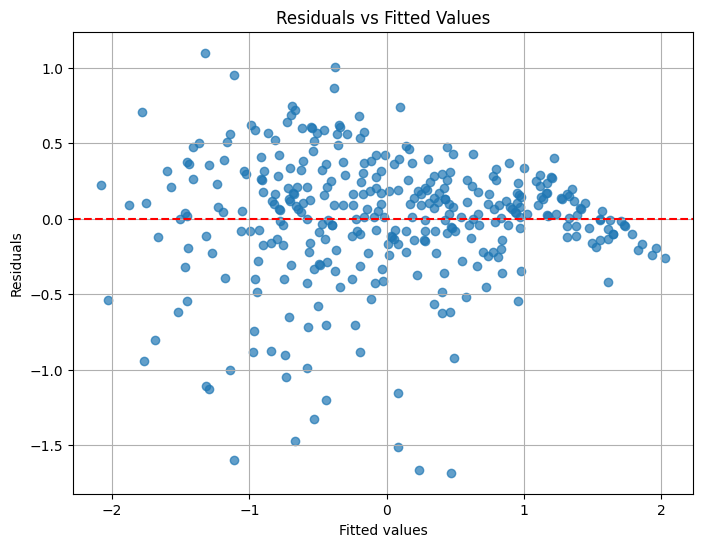

In [56]:
print("\nPlotting residuals vs fitted values...")

# Fit a simple OLS model
model = sm.OLS(y_train, X_sm).fit()

# Predicted values
fitted_vals = model.predict(X_sm)

# Residuals
residuals = y_train - fitted_vals

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

In [57]:
# Assumption 5: Data should not be Auto-Correlated (Normality of residual Data)

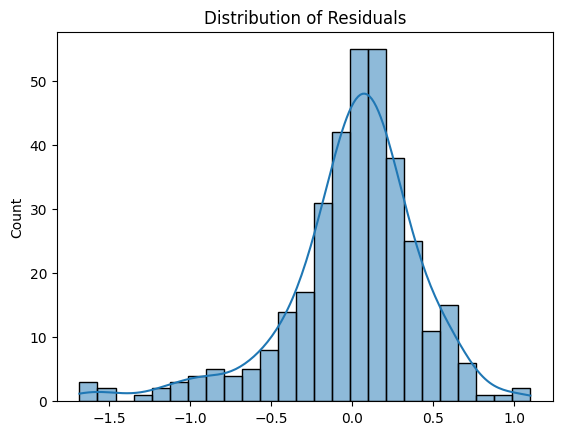

In [58]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

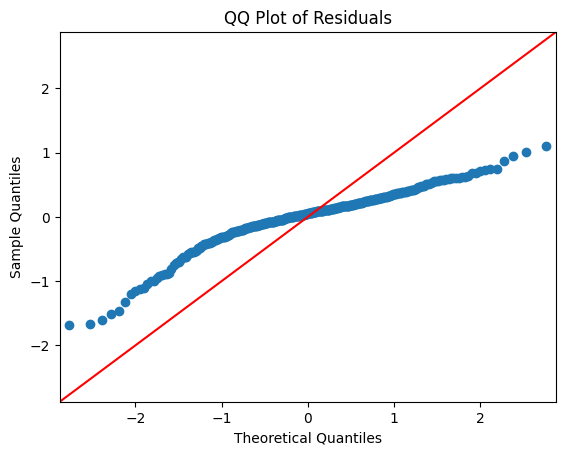

In [59]:
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# **Model Performance Evaluation**

Training R² Score: 0.8211
Validation R² Score: 0.8188
Training RMSE: 0.4212
Validation RMSE: 0.4317

Model Evaluation:
Great model! Training and Validation R² and RMSE are close and good.

                             OLS Regression Results                            
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     224.3
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          5.67e-141
Time:                        15:04:10   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             461.4
Df Residuals:                     391   BIC:                             497.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    

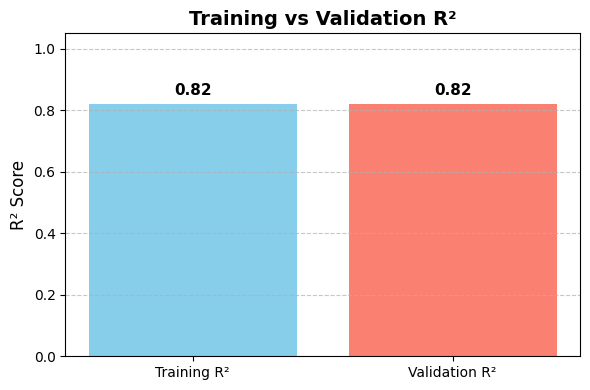

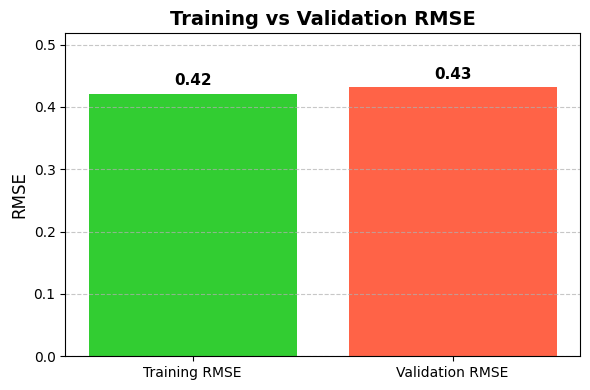

In [60]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Separate Features (X) and Target (y)
X = df.drop('Chance_of_Admit_', axis=1)
y = df['Chance_of_Admit_']

# 1. Split data into Train and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Add constant (for intercept) manually
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 3. Create and Train the model
model = sm.OLS(y_train, X_train_const)
result = model.fit()

# 4. Predict on Train set
y_train_pred = result.predict(X_train_const)

# 5. Predict on Validation set
y_test_pred = result.predict(X_test_const)

# 6. Calculate R² on both sets
r2_train = result.rsquared  # training R² directly from result
r2_test = 1 - (sum((y_test - y_test_pred)**2) / sum((y_test - y_test.mean())**2))  # manual R² calculation

# 6. Calculate RMSE on both sets
rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

# 7. Print the scores
print(f"Training R² Score: {r2_train:.4f}")
print(f"Validation R² Score: {r2_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_test:.4f}")

# 7. Evaluate model performance based on R²
print("\nModel Evaluation:")

if r2_train >= 0.8 and abs(r2_train - r2_test) <= 0.05 and abs(rmse_train - rmse_test) <= 0.05:
    print("Great model! Training and Validation R² and RMSE are close and good.")
elif r2_train - r2_test > 0.1 or rmse_test - rmse_train > 0.1:
    print("Overfitting detected! Training performance much better than Validation.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("Underfitting detected! Both Training and Validation R² are low.")
else:
    print("Model needs further checking. Moderate performance.")

# 8. Print full model summary
print("\n",result.summary(),"\n")
import matplotlib.pyplot as plt

# R² Score plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Training R²', 'Validation R²'], [r2_train, r2_test], color=['#87CEEB', '#FA8072'])  # softer custom colors
plt.ylim(0, 1.05)  # Slightly more space above bars
plt.ylabel('R² Score', fontsize=12)
plt.title('Training vs Validation R²', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# RMSE plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Training RMSE', 'Validation RMSE'], [rmse_train, rmse_test], color=['#32CD32', '#FF6347'])  # limegreen, tomato
plt.ylim(0, max(rmse_train, rmse_test) * 1.2)  # dynamic limit
plt.ylabel('RMSE', fontsize=12)
plt.title('Training vs Validation RMSE', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.02 * max(rmse_train, rmse_test)),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


# ===============================
# 📊 MODEL PERFORMANCE INTERPRETATION
# ===============================
# R² Score (Coefficient of Determination):
# - Indicates how well the independent variables explain the variance in the dependent variable.
# - Range: [-∞, 1]
#     - 1: Perfect fit (model explains all variance)
#     - 0: Model predicts no better than the mean
#     - < 0: Model performs worse than a naive mean prediction
# ➔ RMSE (Root Mean Squared Error):
#     - Measures the average prediction error magnitude
#     - RMSE shows how big the average prediction errors are (error magnitude)
#     - Lower RMSE = Better fit

# 🧩 Model Evaluation Scenarios:
# - High Training R² ≈ High Validation R² (both close to 1):
#     → Model generalizes well (Ideal scenario)
# - High Training R² >> Low Validation R²:
#     → Overfitting detected (Model memorizes training data but fails on unseen data)
# - Low Training R² and Low Validation R² (both < 0.5):
#     → Underfitting detected (Model too simple; needs higher complexity/features)

# ✅ A good model should show:
#     - Consistent training and validation performance
#     - R² values reasonably high (generally > 0.5 unless domain-specific)

# (r2_train - r2_test) measures the gap between training and validation performance
# - Small gap → Model generalizes well
# - Large gap (>0.1) → Model overfits the training data

# 🛡 If gap between RMSE_train and RMSE_test is large → Overfitting suspected.
# 🛡 If both RMSE values are large → Underfitting suspected.



In [61]:
from sklearn.metrics import mean_absolute_error

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R2 Score: 0.8188
RMSE: 0.4317
MAE: 0.3030


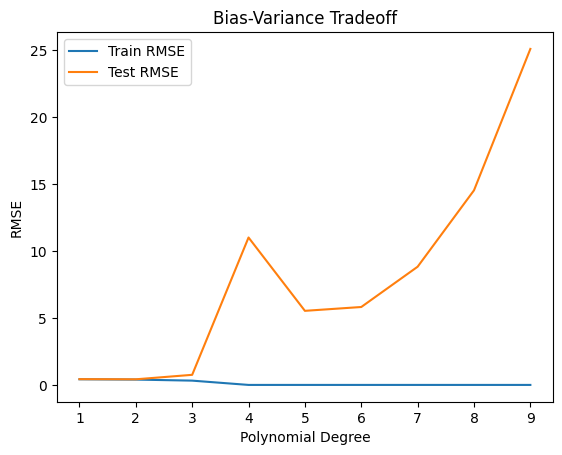

In [62]:
from sklearn.preprocessing import PolynomialFeatures

train_errors = []
test_errors = []
degrees = range(1, 10)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_poly_train_pred = model.predict(X_poly_train)
    y_poly_test_pred = model.predict(X_poly_test)

    train_errors.append(np.sqrt(mean_squared_error(y_train, y_poly_train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_poly_test_pred)))

plt.plot(degrees, train_errors, label='Train RMSE')
plt.plot(degrees, test_errors, label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()


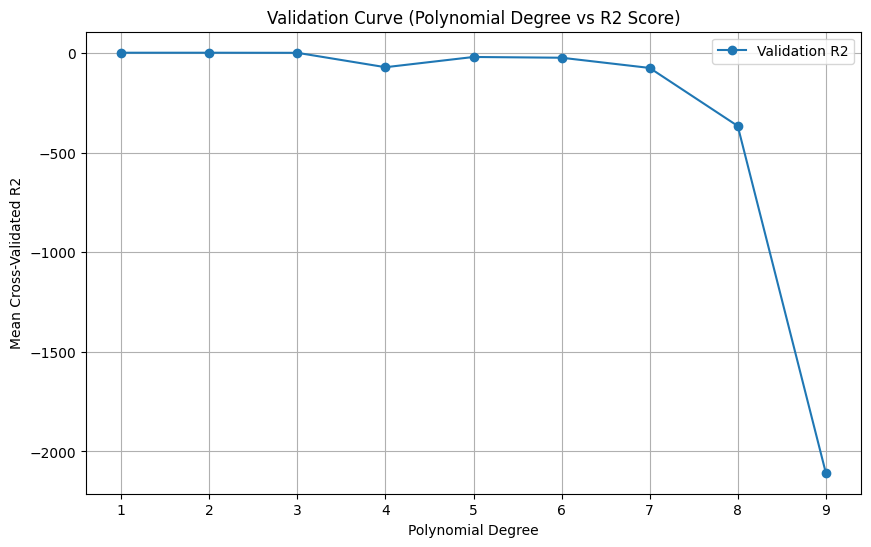

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Define range of degrees you want to try
degrees = np.arange(1, 10)

train_scores = []
validation_scores = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Cross-validation: 5-Fold CV
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Save mean R2 score
    validation_scores.append(scores.mean())

# Plotting
plt.figure(figsize=(10,6))
plt.plot(degrees, validation_scores, marker='o', label='Validation R2')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Cross-Validated R2')
plt.title('Validation Curve (Polynomial Degree vs R2 Score)')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
# From the Bias-Variance Tradeoff graph:
# - Train RMSE is extremely low for high degrees (degree >= 4), almost zero — indicating overfitting.
# - Test RMSE increases sharply after degree 3, showing poor generalization for higher degrees.

# From the Validation Curve (Polynomial Degree vs R2 Score) graph:
# - Validation R2 is close to 0 for degrees 1 to 3 — not great, but acceptable.
# - Validation R2 drops heavily into large negative values beyond degree 4 — showing extreme overfitting.

# Conclusion:
# Degree 1, 2, or 3 are safer choices.
# - Degree 1: Might be underfitting a bit (high bias).
# - Degree 2 or 3: Might capture some patterns without overfitting too much.
#
# Final Suggestion:
# - Choose Polynomial Degree = 2 or 3 for better model performance.
# - Then, further fine-tune by cross-validation if needed.


Adjusted R-square (Linear Model): 0.81740693006749


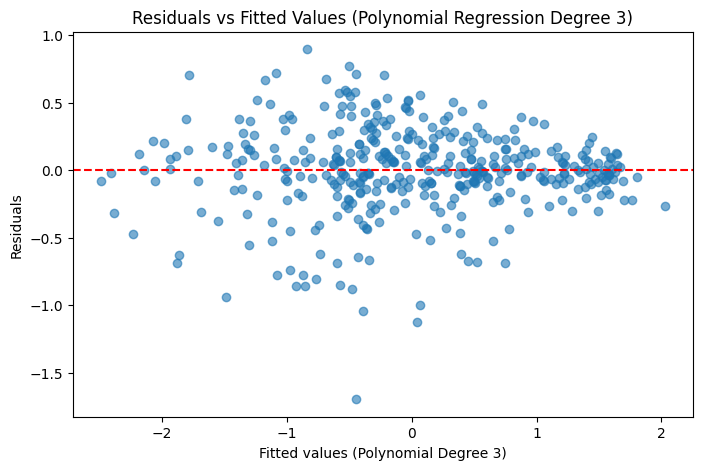

Adjusted R-square (Polynomial Degree 3): 0.894370811627636


In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define Adjusted R-square function once
def adj_r(r_sq, X, Y):
    adj_r1 = (1 - ((1 - r_sq) * (len(Y) - 1)) / (len(Y) - X.shape[1] - 1))
    return adj_r1

# Simple Linear Regression R2 and Adjusted R2 (if needed)
r2 = r2_score(y_train, y_train_pred)
print('Adjusted R-square (Linear Model):', adj_r(r2, X_train, y_train))

# Polynomial Regression Degree 3
model_poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Fit the model
model_poly3.fit(X_train, y_train)

# Predict
y_train_pred_poly3 = model_poly3.predict(X_train)

# Residuals
residuals_poly3 = y_train - y_train_pred_poly3

# Plot Residuals vs Fitted
plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_poly3, residuals_poly3, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values (Polynomial Degree 3)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Polynomial Regression Degree 3)')
plt.show()

# R2 and Adjusted R2 for Polynomial
r2_poly3 = r2_score(y_train, y_train_pred_poly3)
print('Adjusted R-square (Polynomial Degree 3):', adj_r(r2_poly3, X_train, y_train))


In [ ]:
# Linear Regression Adjusted R²: 0.8174
# Polynomial Regression (Degree 3) Adjusted R²: 0.8944
# --> Polynomial model captures nonlinear patterns better and has higher explanatory power.